### Correlation
* Relation between 2 variables, Measured by Pearson's Correlation Coef.
* <b>+1 Positive</b> - *if x increases, y also increases*
* <b>-1 Negative</b> - *if x increases, y decreases*
* <b>0 No Relationship</b> - *If x increases, no effect on y*

*For time series analysis, istead of 2 different variables, X is lagged value of Y. So therefore it is called <b>AutoCorrelation</b> that is correlation with itself*

### ARIMA
ARIMA = AutoRegresion Intergrated Moving Average
Intergrated to handle trend NOT SEASONALITY.
To handle seasonality we use SARIMA.
#### Steps.
1. Use differencing to remove tred
2. Use AR to do forecasting
3. Use MA on residuals to update the forecast
4. Add Trend and seasonality to get the forecasted value

 <b>`Parameters`</b>
 1. <b> P - Order or Autoregression </b>
 *How many lag variables to choose*
 2. <b> D- Order of Integration </b>
 *Number of differencing needed*
 3. <b> Q-Order of Moving Average</b>
 *What is the window size for Moving Average*

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("shampoo.csv", header = 0, parse_dates = [0])

In [6]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


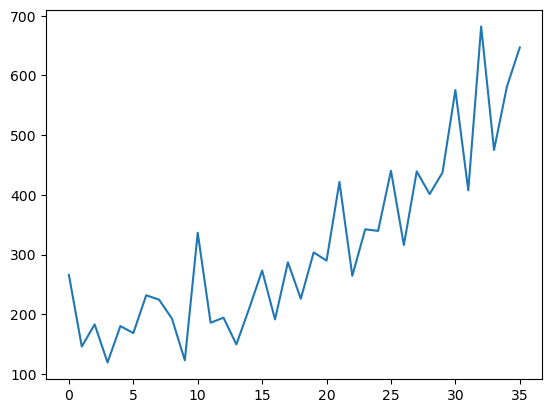

In [8]:
df.Sales.plot()
plt.show()

The trend portrays quadratic properties and hence differencing to make it stationary and hence our d = 2

##### Autocorrelation Plot

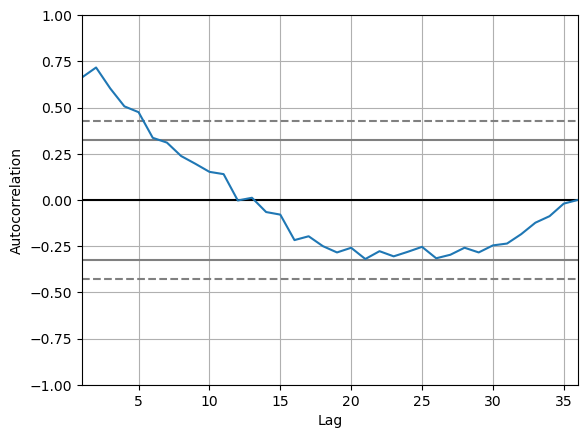

In [9]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

p = 5

Partial Autocorrelation Graph

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf

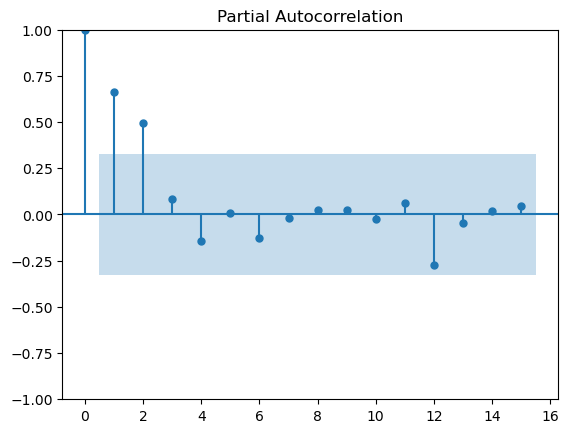

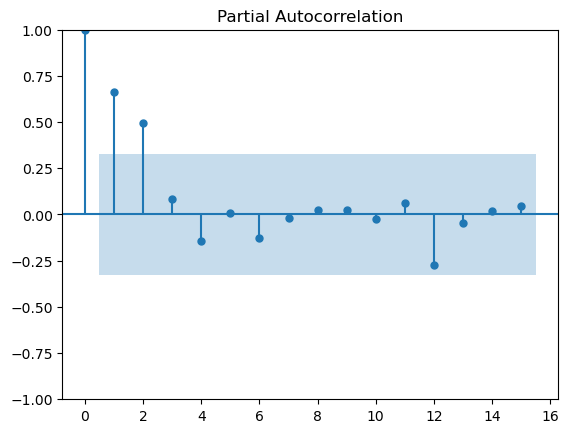

In [12]:
plot_pacf(df['Sales'],lags=15, method='ywm')

In [13]:
q=2

In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
model = ARIMA(df['Sales'], order=(2,2,5))


In [18]:
model_fit = model.fit()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [19]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 2, 5)   Log Likelihood                -189.635
Date:                Sat, 18 May 2024   AIC                            395.269
Time:                        11:46:49   BIC                            407.480
Sample:                             0   HQIC                           399.434
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9079      0.246     -7.741      0.000      -2.391      -1.425
ar.L2         -0.9544      0.219     -4.363      0.000      -1.383      -0.526
ma.L1         -0.0681     19.840     -0.003      0.997     -38.955      38.819
ma.L2         -1.8461      2.772     -0.666      0.505      -7.280       3.587
ma.L3          0.3024     19.787      0.015      0.988     -38.479      39.084
ma.L4          0.9883      2.804      0.352      0.725      -4.508       6.484
ma.L5         -0.1280      0.339     -0.377      0.706      -0.793       0.537
sigma2      2696.5391      0.014   1.95e+05      0.000    2696.512    2696.566
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.39   Prob(JB):                         0.92
Heteroskedasticity (H):               0.94   Skew:                            -0.01
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.43e+22. Standard errors may be unstable.
"""

In [20]:
residuals = model_fit.resid
residuals

0     266.000000
1    -251.672259
2     145.276527
3      24.464574
4      81.911586
5      69.817662
6     103.750071
7      65.031274
8      13.101766
9     -96.890520
10    150.079119
11    -12.833568
12    -28.044256
13    -95.898719
14     -0.758623
15     32.160636
16      8.256565
17     20.000609
18     41.113383
19     18.767569
20     82.871321
21    114.882903
22     11.845895
23    -17.575890
24     16.190792
25     58.282550
26    -65.510793
27     22.929560
28    -45.945495
29     10.116490
30     66.125208
31    -33.299644
32    107.996819
33    -13.009238
34    -42.601810
35     79.013371
dtype: float64

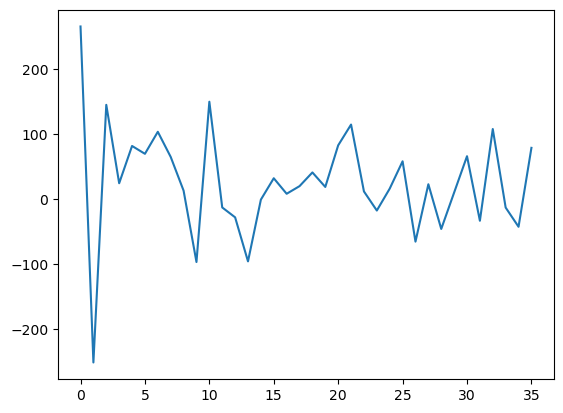

In [21]:
residuals.plot()
plt.show()

In [23]:
residuals.describe()

count     36.000000
mean      25.165151
std       86.508606
min     -251.672259
25%      -14.150901
50%       19.384089
75%       72.116589
max      266.000000
dtype: float64

In [24]:
output = model_fit.forecast()

In [25]:
output

36    656.793958
dtype: float64

In [26]:
model_fit.forecast(5)

36    656.793958
37    637.267869
38    712.226552
39    710.394117
40    755.776412
Name: predicted_mean, dtype: float64

### Walk-Forward ARIMA

In [28]:
df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [34]:
train_size = int(df.shape[0]*0.7)
train_size

25

In [35]:
train, test = df.Sales[0:train_size], df.Sales[train_size:]

In [36]:
train.shape, test.shape

((25,), (11,))

In [38]:
data = train
predict = []
for t in test:
    model = ARIMA(data, order=(5,1,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y)
    predict.append(y)
    data = np.append(data, t)

25    368.668956
dtype: float64
[335.04474061]
[363.22022144]
[357.64532378]
[443.0478353]
[378.36567357]
[459.41502078]
[526.89087564]
[457.23127432]
[672.91494345]
[531.54144895]


In [39]:
predict

[25    368.668956
 dtype: float64,
 array([335.04474061]),
 array([363.22022144]),
 array([357.64532378]),
 array([443.0478353]),
 array([378.36567357]),
 array([459.41502078]),
 array([526.89087564]),
 array([457.23127432]),
 array([672.91494345]),
 array([531.54144895])]

In [40]:
data

array([266. , 145.9, 183.1, 119.3, 180.3, 168.5, 231.8, 224.5, 192.8,
       122.9, 336.5, 185.9, 194.3, 149.5, 210.1, 273.3, 191.4, 287. ,
       226. , 303.6, 289.9, 421.6, 264.5, 342.3, 339.7, 440.4, 315.9,
       439.3, 401.3, 437.4, 575.5, 407.6, 682. , 475.3, 581.3, 646.9])

In [42]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)

In [43]:
mse

9170.052439033101

# SARIMA

SARIMA - Seasonal Auto Regression Intergrated Moving Average
ARIMA for only trend in data, SARIMA for both trend and seasonality

<b>`Parameters`</b>
 SARIMA(p,d,q)(P,D,Q)m
 * p: Trend autoregression order.
 * d: Trend difference order
 * q: Trend moving average order
 <b>Seasonal Elements</b>
 These are four s easonal elements that are not part of ARIMA  that must be configured. They are:
     * P. Seasonal autoregressive order
     * D: Seasonal Difference order
     * Q: Seasonal Moving Average order
     * m: The number of time steps for a single period

# SARIMAX
SARIMAX - Seasonal Auto Regression Intergrated Moving Average Exogenous

<b> To predict stock prices:-</b>

We may use
* Historical Closing Prices
* Other variables - Volume traded, openign price, Daily High etc

<b> To Predict sales:-</b>

We may use
* Previousl day sales
* Other variables - Holidays, Salary day Promotions etc

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [45]:
df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header= 0, parse_dates=[0])
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [47]:
df.tail()

,Month,MilesMM
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595
95,1970-12-01,12772


In [48]:
df.index = df['Month']

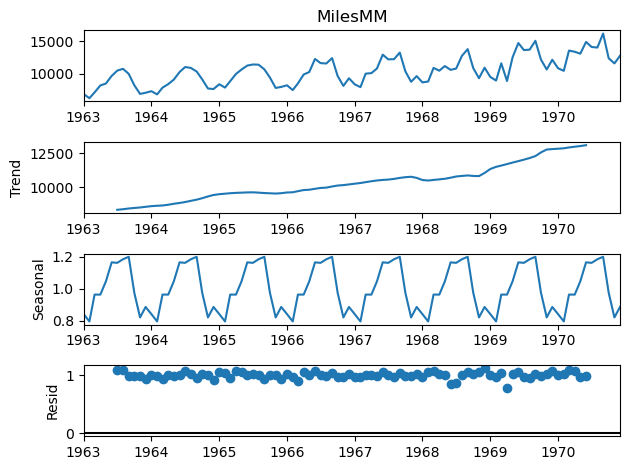

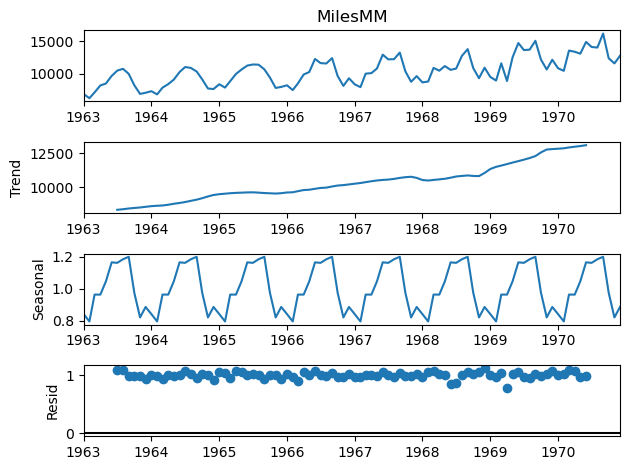

In [50]:
result_a = seasonal_decompose(df['MilesMM'], model='multiplicative')
result_a.plot()

In [51]:
model = SARIMAX(df['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [52]:
model = model.fit()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [53]:
redisuals = model.resid

<Axes: >

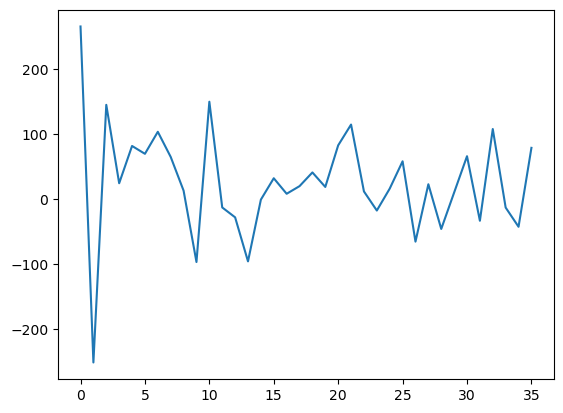

In [54]:
residuals.plot()

In [55]:
output = model.forecast()

In [56]:
output

1971-01-01    11476.264173
Freq: MS, dtype: float64

In [57]:
model.forecast(12)

1971-01-01    11476.264173
1971-02-01    11153.563547
1971-03-01    13669.928621
1971-04-01    12647.848775
1971-05-01    14339.011199
1971-06-01    15786.821556
1971-07-01    14979.591310
1971-08-01    15362.181036
1971-09-01    16963.246070
1971-10-01    13682.190540
1971-11-01    12427.101257
1971-12-01    13730.505550
Freq: MS, Name: predicted_mean, dtype: float64

In [58]:
yhat = model.predict()

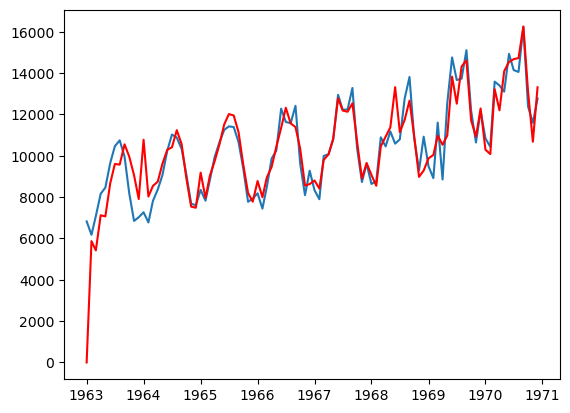

In [61]:
plt.plot(df['MilesMM'])
plt.plot(yhat, color='red')
plt.show()